In [ ]:
from google.colab import drive
drive.mount('drive',force_remount=True)
%cd /content/drive/MyDrive/

Mounted at drive
/content/drive/MyDrive


In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
from sklearn.model_selection import  train_test_split
import pathlib
import matplotlib.pyplot as plt

In [ ]:
Data_url = '/content/drive/MyDrive/Datasets/Datasets'
Data_dir = pathlib.Path(Data_url)

In [ ]:
image_count = len(list(Data_dir.glob('*/*.*')))
print(image_count)

2256


In [ ]:
batch_size = 100
img_height = 128
img_width = 128

In [ ]:
data_ds = tf.keras.utils.image_dataset_from_directory(
  Data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2256 files belonging to 15 classes.


In [ ]:
class_names = data_ds.class_names
print(class_names)

['10DH', '10c', '10cent', '1DH', '1c', '1e', '20c', '20cent', '2DH', '2c', '2e', '50c', '50cent', '5DH', '5c']


In [ ]:
import math

In [ ]:
datagen=ImageDataGenerator(
      rotation_range=(30-180),
      brightness_range=[0.1,1],
      horizontal_flip=True,
      fill_mode='nearest')
ran=math.ceil(image_count/batch_size)
for k in range(ran):
  for images, labels in data_ds.take(k):
    for i in range(len(images)):
      x=img_to_array(images[i])
      x=x.reshape((1,)+x.shape)
      j=0
      for batch in datagen.flow(x, batch_size=1,save_to_dir='/content/drive/MyDrive/Datasets/Datasets/'+class_names[labels[i]], save_prefix='EuroCoins', save_format='png'):
        j += 1
        if j > 20:
          break

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  Data_dir,
  seed=123,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  Data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2256 files belonging to 15 classes.
Using 1805 files for training.
Found 2256 files belonging to 15 classes.
Using 451 files for validation.


In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.0 1.0


In [ ]:
normalized_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = len(class_names)
model = tensorflow.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)      

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
19/19 [==============================] - 6s 207ms/step - loss: 0.6536 - accuracy: 0.7861 - val_loss: 0.6180 - val_accuracy: 0.8137
Epoch 2/10
19/19 [==============================] - 5s 202ms/step - loss: 0.5369 - accuracy: 0.8443 - val_loss: 0.5842 - val_accuracy: 0.8293
Epoch 3/10
19/19 [==============================] - 5s 203ms/step - loss: 0.4822 - accuracy: 0.8499 - val_loss: 0.5393 - val_accuracy: 0.8337
Epoch 4/10
19/19 [==============================] - 5s 200ms/step - loss: 0.4625 - accuracy: 0.8687 - val_loss: 0.5394 - val_accuracy: 0.8204
Epoch 5/10
19/19 [==============================] - 5s 203ms/step - loss: 0.4069 - accuracy: 0.8748 - val_loss: 0.4725 - val_accuracy: 0.8714
Epoch 6/10
19/19 [==============================] - 5s 199ms/step - loss: 0.3481 - accuracy: 0.8986 - val_loss: 0.3916 - val_accuracy: 0.8936
Epoch 7/10
19/19 [==============================] - 6s 213ms/step - loss: 0.3040 - accuracy: 0.9186 - val_loss: 0.3221 - val_accuracy: 0.9157
Epoch 

5/5 - 1s - loss: 0.2331 - accuracy: 0.9512 - 985ms/epoch - 197ms/step


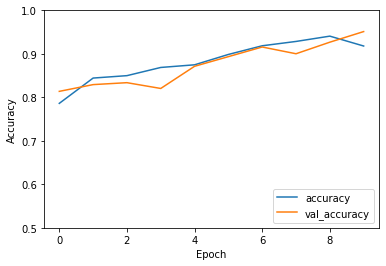

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

In [ ]:
print(test_acc)

0.9512194991111755


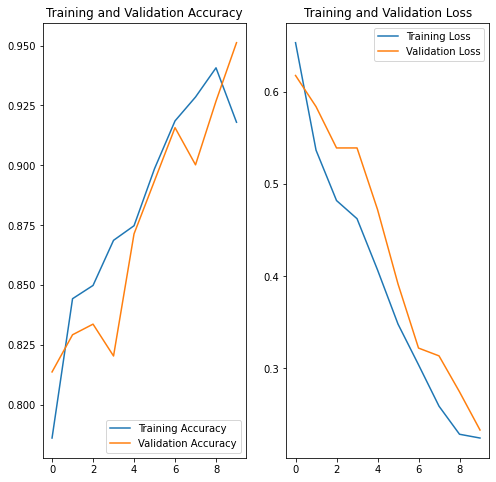

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate(val_ds)

5/5 [==============================] - 1s 32ms/step - loss: 0.2331 - accuracy: 0.9512


[0.2331250011920929, 0.9512194991111755]

In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
model.save('ModelC')

INFO:tensorflow:Assets written to: ModelC/assets


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
%cd /content/drive/MyDrive/test_Image

/content/drive/MyDrive/test_Image


[[  4.668583  -14.19905    -7.61432    20.35256    -8.212924    2.7547529
   -3.7697115   7.169833   14.776964    7.4124727  -1.7538482   6.218258
   10.353691   13.772829  -12.578538 ]]
3
1DH
[[  5.7855315 -16.112064   -7.9832087  23.323975   -9.4333      3.436701
   -4.596473    8.188324   16.501163    6.87616    -2.0338914   6.8098974
   12.130416   15.502678  -15.269123 ]]
3
1DH
[[  8.123086  -19.604212   -8.338016   28.52581   -11.050837    5.086379
   -6.012281    8.707542   18.397877    5.654767   -2.4145372   7.639384
   15.201293   18.002357  -19.301039 ]]
3
1DH
[[ 11.002262  -22.071522   -9.051      33.084713  -11.7254095   7.5641522
   -7.267957    7.9900055  19.270502    4.4462233  -2.9150755   8.065324
   18.512592   18.665022  -21.952589 ]]
3
1DH
[[  5.556121  -15.413695   -7.8371735  22.304602   -9.074347    3.354932
   -4.324826    7.948987   16.077652    7.052577   -2.0896847   6.6322174
   11.679984   14.751191  -14.56746  ]]
3
1DH
[[  6.684628  -17.520071   -8.462899

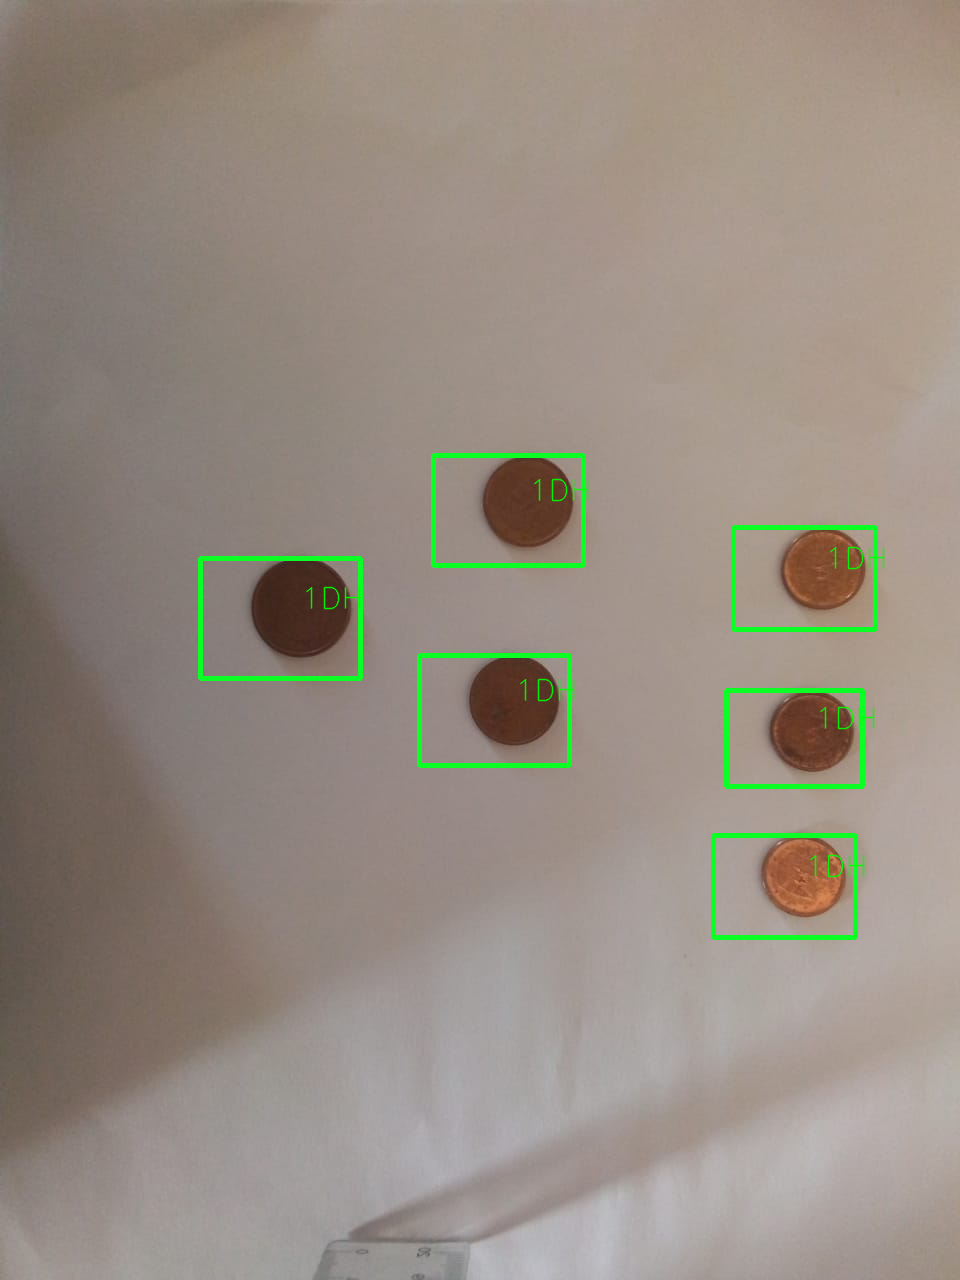

In [ ]:
s=0
img =cv2.imread('/content/drive/MyDrive/test_Image/test7.jpeg')
img+=2
img_c=img.copy()
img_c2=img.copy()
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img ,cv2.COLOR_RGB2GRAY)
circles = cv2.HoughCircles(img , cv2.HOUGH_GRADIENT,0.9,120,param1 = 50 , param2 = 30,minRadius=10 , maxRadius=120 )
circles_rounded = np.uint16(np.around(circles))
font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles_rounded[0,:]:
    probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
   # img_t=cv2.circle(img_c,(i[0],i[1]),i[2],(200,100,200),3)
    cv2.rectangle(img_c, (i[0]-i[2]-50,i[1]-i[2]), (i[0]+i[2]+10,i[1]+i[2]+20), (36,255,12), 3)
    #cv2.putText(img_c ,'Christmas', (i[0],i[1]), font, 1, (0, 255, 0), 1, cv2.LINE_AA)
    x=i[0]-i[2]-30
    y=i[1]-i[2]-20
    h=i[1]+i[2]+20
    w=i[0]+i[2]+10
    ROI = img_c2[y:h, x:w]
    ROI = cv2.resize(ROI, (128, 128))
    img_array = tf.keras.utils.img_to_array(ROI)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
   
    score = tf.nn.softmax(predictions[0])
    k=class_names[np.argmax(predictions[0])]
    cv2.putText(img_c ,k, (i[0],i[1]), font, 1, (0, 255, 0), 1, cv2.LINE_AA)

cv2_imshow(img_c)